In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from datetime import datetime
import tqdm as tqdm
import glob

In [2]:
data = pd.read_csv("clinical_annotation.csv")

In [3]:
data.head()

,Unnamed: 0,ID,LABEL,GENDER,DOB,LYMPH_COUNT
0,0,P26,1,M,11/3/1933,11.2
1,1,P183,1,M,5/15/1942,12.8
2,2,P89,1,M,6/19/1935,9.6
3,3,P123,1,M,1/27/1931,122.6
4,4,P61,1,F,3/5/1931,11.6


In [4]:
data[["ID", "LABEL", "LYMPH_COUNT"]]
plt.show()

In [5]:
data = data.sort_values("LYMPH_COUNT")

In [6]:
data_train = data[data["LABEL"]!=-1]
data_test = data[data["LABEL"]==-1]

In [7]:
X, y = data_train["LYMPH_COUNT"].values, data_train["LABEL"].values

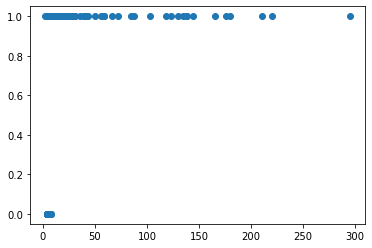

In [9]:
plt.scatter(X, y)

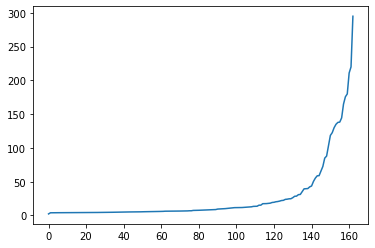

In [8]:
plt.plot(X)

In [191]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [192]:
clf = RandomForestClassifier(n_estimators=100)

In [193]:
clf.fit(X_train.reshape(-1, 1), y_train)

RandomForestClassifier()

In [194]:
np.sum(clf.predict(X_val.reshape(-1,1))==y_val)/len(y_val)

0.8536585365853658

In [195]:
X_test = data_test["LYMPH_COUNT"].values

In [196]:
y_pred = clf.predict(X_test.reshape(-1, 1))

In [11]:
images = glob.glob("trainset/*/*.jpg")
images.sort()
n = len(images)

In [12]:
submission = pd.DataFrame()

In [200]:
submission["Id"] = list(data_test["ID"].values)
submission["Predicted"] = y_pred

In [205]:
submission.to_csv("submission.csv", sep=",", index=False)

In [204]:
ls

clinical_annotation.csv  sample_submission.csv  testset/   Untitled.ipynb
labs/                    submission.csv         trainset/


In [201]:
submission

,Id,Predicted
0,P71,0
1,P16,1
2,P114,0
3,P170,0
4,P98,0
5,P69,1
6,P92,1
7,P132,1
8,P81,1
9,P73,0


In [13]:
index = np.random.randint(n)

In [14]:

index = np.random.randint(n)
img = plt.imread(images[index])

In [19]:
patients = glob.glob("trainset/*")
patients.sort()

In [20]:
nb_images = []

for patient in patients :
    nb_images.append(len(glob.glob(patient+"/*")))

In [21]:
nb_images

[87,
 80,
 32,
 43,
 52,
 149,
 29,
 62,
 62,
 51,
 85,
 80,
 135,
 67,
 194,
 171,
 74,
 66,
 32,
 113,
 42,
 46,
 68,
 57,
 173,
 112,
 54,
 153,
 33,
 156,
 45,
 130,
 53,
 46,
 165,
 108,
 136,
 54,
 34,
 79,
 73,
 69,
 78,
 33,
 166,
 57,
 110,
 85,
 94,
 77,
 87,
 64,
 85,
 95,
 180,
 31,
 53,
 63,
 50,
 158,
 28,
 80,
 53,
 96,
 169,
 38,
 43,
 45,
 39,
 77,
 96,
 70,
 41,
 171,
 120,
 45,
 63,
 188,
 60,
 79,
 49,
 102,
 113,
 114,
 41,
 92,
 55,
 74,
 88,
 47,
 140,
 72,
 34,
 66,
 61,
 61,
 97,
 106,
 173,
 43,
 100,
 169,
 20,
 54,
 66,
 97,
 72,
 156,
 50,
 198,
 49,
 170,
 45,
 36,
 89,
 53,
 171,
 64,
 63,
 44,
 187,
 28,
 165,
 120,
 43,
 45,
 47,
 81,
 40,
 29,
 162,
 68,
 66,
 56,
 16,
 46,
 42,
 99,
 63,
 104,
 53,
 36,
 64,
 50,
 69,
 38,
 169,
 56,
 56,
 54,
 113,
 54,
 183,
 57,
 65,
 52,
 163,
 51,
 90,
 74,
 145,
 57,
 86,
 0]

In [22]:
patients[-1]

'trainset/trainset_true.csv'

In [28]:
index = np.random.randint(n)
img = plt.imread(images[index])

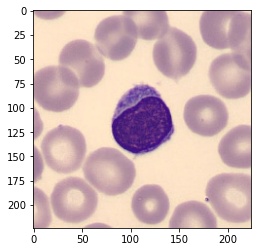

In [29]:
plt.imshow(img)
plt.show()

In [31]:
img.shape

(224, 224, 3)

| Layer | Layer Name | Output Size | Residual Blocks |
|:-------|------------|-------------|-----------------|
| 1 | conv1 | 112 × 112 | |
| 2 | conv2 | 56 × 56 | [3 × 3, K 3 × 3, K] |
| 3 | conv3 | 28 × 28 | [3 × 3, 2K 3 × 3, 2K] 
| 4 | conv4 | 14 × 14 | [3 × 3, 4K 3 × 3, 4K]
| 5 | conv5 | 7 × 7 | [3 × 3, 8K 3 × 3, 8K] |
| 6 | flatten | 7 · 7 · 8K |

Loss : negative log likelihood loss

In [52]:
pd.read_csv(patients[-1])

,ID,LABEL,GENDER,DOB,LYMPH_COUNT
0,P26,1,M,11/3/1933,11.20
1,P183,1,M,5/15/1942,12.80
2,P89,1,M,6/19/1935,9.60
3,P123,1,M,1/27/1931,122.60
4,P61,1,F,3/5/1931,11.60
...,...,...,...,...,...
158,P135,1,M,27-08-1951,9.45
159,P8,0,M,16-05-1975,4.91
160,P130,0,F,16-05-1943,4.17
161,P70,1,M,05-09-1987,5.66


In [72]:
class ImageDataset(Dataset):
    def __init__(self, root_dir):
        data = pd.read_csv(root_dir+"/trainset_true.csv")
        self.id_label = {}
        for Id, label in zip(data["ID"], data["LABEL"]):
            self.id_label[Id] = label
        
        self.images = glob.glob("trainset/P*/*")
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        file_name = self.images[idx]
        sp = file_name.split("/")
        Id = sp[1] 
        image, y = plt.imread(file_name), self.id_label[Id]
        return image, y

In [95]:
dataset = ImageDataset("trainset")
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [89]:
DataLoader(training_data, batch_size=64, shuffle=True)

In [135]:
ls

clinical_annotation.csv   labs/                  submission.csv  trainset/
dl_medical_imaging.ipynb  sample_submission.csv  testset/


In [139]:
data["DOB"].values

array(['9/29/1928', '9/26/1934', '9/9/1983', '02-03-1953', '19-04-1970',
       '6/21/1934', '3/30/1971', '01-02-1964', '8/3/1963', '4/2/1999',
       '11/16/1993', '5/19/1992', '3/4/1969', '16-05-1943', '11/30/1953',
       '11-04-1990', '2/23/1927', '4/7/1983', '1/16/1954', '11-03-1946',
       '19-09-1967', '10/12/1959', '6/21/1923', '3/28/1959', '6/14/1983',
       '2/28/1980', '5/11/1992', '8/14/1971', '19-12-1940', '12-05-1958',
       '4/21/1949', '5/3/1943', '5/20/1959', '12/8/1981', '5/29/1927',
       '11/19/1941', '11/16/1977', '3/24/1958', '6/16/1929', '25-03-1931',
       '08-02-1944', '19-09-1984', '10/12/1977', '3/19/1946', '11/3/1933',
       '24-11-1959', '16-05-1975', '29-07-1954', '5/18/1946', '3/13/1954',
       '4/24/1936', '4/28/1949', '30-11-1945', '3/27/1960', '08-09-1948',
       '20-05-1997', '2/14/1949', '4/9/1977', '2/23/1943', '9/26/1947',
       '12/4/1966', '11/6/1932', '10/1/1979', '6/2/1932', '12/18/1924',
       '1/3/1943', '16-01-1954', '07-11-1964', 

In [236]:
data[data["LABEL"]!=-1]

,Unnamed: 0,ID,LABEL,GENDER,DOB,LYMPH_COUNT
107,107,P62,1,M,9/29/1928,2.28
53,53,P116,1,F,9/26/1934,3.94
152,152,P162,0,F,9/9/1983,4.01
189,189,P72,0,F,02-03-1953,4.02
186,186,P25,0,M,19-04-1970,4.02
...,...,...,...,...,...,...
117,117,P147,1,F,4/10/1963,175.71
14,14,P111,1,M,6/5/1941,180.00
10,10,P23,1,M,3/19/1942,211.00
8,8,P184,1,F,6/12/1932,220.00


In [340]:
class ClinicalData(Dataset):
    def __init__(self, root_dir):
        data = pd.read_csv(root_dir)
        data = data[data["LABEL"]!=-1]
        self.label = data["LABEL"].values 
        self.counts = data["LYMPH_COUNT"].values
        self.ages = []
        for bod in data["DOB"]:
            self.ages.append(2024 - int(bod[-4:]))
        
        self.features = torch.Tensor(list(zip(self.counts, self.ages)))
        
    def __len__(self):
        return len(self.label)
    
    def __getitem__(self, idx):
        y = self.label[idx]
        x = self.features[idx]
        
        return x, torch.Tensor([y])

In [350]:
clinical_data = ClinicalData("clinical_annotation.csv")
dataloader = DataLoader(clinical_data, batch_size=64, shuffle=True)

In [349]:
x, y = next(iter(dataloader))
x[0], y[0]

(tensor([ 4.2800, 41.0000]), tensor([0.]))

In [345]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(2, 2),
            nn.Linear(2, 1)
        )
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.mlp(x))

In [330]:
model = MLP()

In [337]:
data_train = data[data["LABEL"]!=-1]

In [331]:
optimizer = torch.optim.Adam(params = model.parameters(), lr=1e-1)
criterion = nn.BCELoss()

In [332]:
torch.log(torch.Tensor([2.]))

tensor([0.6931])

In [333]:
nn.Sigmoid()

Sigmoid()

In [334]:
n_epochs = 1000
losses = []
for _ in tqdm.tqdm(range(n_epochs)):
    for i, (x, y) in enumerate(dataloader) :
        y_pred = model(x)
        optimizer.zero_grad()
        loss = criterion(y_pred, y)
        losses.append(loss.item())
        loss.backward()
        
        optimizer.step()
        

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 350.03it/s]


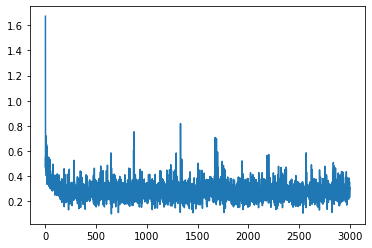

In [335]:
plt.plot(losses)

In [388]:
X, y = clinical_data.features, clinical_data.label

In [381]:
y_pred = (model(X)>.5).numpy().astype(float)[:,0]

In [382]:
print("Accuracy on training set") np.sum(y==y_pred)/len(y)

0.8588957055214724

In [389]:
Xtrain, Xval = train_test_split(X)

In [289]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        residual = x
        out = F.relu(self.bn(self.conv1(x)))
        out = self.bn(self.conv2(out))
        out += residual
        out = F.relu(out)
        return out

class ConvolutionalFeatureExtractor(nn.Module):
    def __init__(self, in_channels, num_classes, K):
        super(ConvolutionalFeatureExtractor, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3)
        self.conv2 = self._make_layer(64, K, 2)
        self.conv3 = self._make_layer(128, 2*K, 2)
        self.conv4 = self._make_layer(256, 4*K, 2)
        self.conv5 = self._make_layer(512, 8*K, 2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(7 * 7 * 8 * K, num_classes)

    def _make_layer(self, in_channels, out_channels, blocks):
        layers = []
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=2))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

In [37]:
model = ConvolutionalFeatureExtractor(3, K=8, num_classes=2)

In [43]:
optimizer = torch.optim.Adam(params = model.parameters())
criterion = loss = nn.NLLLoss()

In [42]:
torch.optim.Adam?